In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
sb.set()

In [4]:
ground=pd.read_csv('ground.csv')
canopy=pd.read_csv('canopy.csv')

In [5]:
ground.sample(5)

,Unnamed: 0,TIMESTAMP,Pyra1_Wm2_Avg,Pyra2_Wm2_Avg,RECORD,AmbTemp_C_Avg,InvPAC_kW_Avg,InvPDC_kW_Avg,PwrMtrP_kW_Avg
523292,523292,2017-10-30 09:32:00-05:00,160.742288,192.490898,649649.0,8.780,46.75,51.580,46.57
330401,330401,2017-07-18 10:41:00-05:00,865.489687,915.606565,501400.0,31.320,189.40,206.000,187.90
522225,522225,2017-10-29 15:45:00-05:00,-5.465000,-0.504343,648582.0,12.770,0.00,3.188,-0.37
180936,180936,2017-02-03 15:36:00-05:00,116.071846,118.184371,264758.0,1.693,31.09,40.950,31.08
242783,242783,2017-06-18 14:23:00-05:00,413.320348,413.953487,458469.0,33.010,86.50,99.900,85.60


## Looking at some distributions

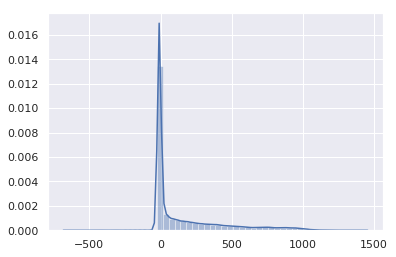

In [10]:
pyra1=pd.DataFrame(ground['Pyra1_Wm2_Avg'])
sb.distplot(pyra1[pyra1.Pyra1_Wm2_Avg.notnull()])

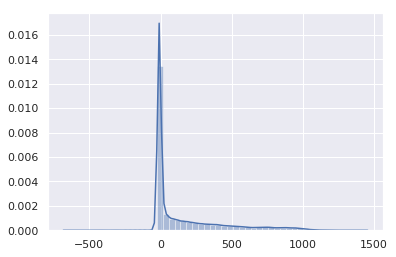

In [11]:
pyra2=pd.DataFrame(ground['Pyra2_Wm2_Avg'])
sb.distplot(pyra1[pyra2.Pyra2_Wm2_Avg.notnull()])

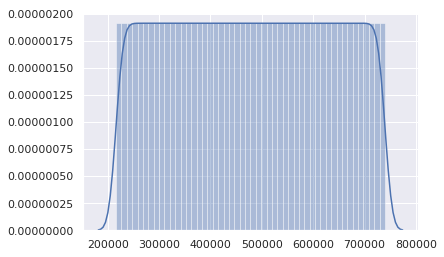

In [15]:
record=pd.DataFrame(ground['RECORD'])
sb.distplot(record[record.RECORD.notnull()])

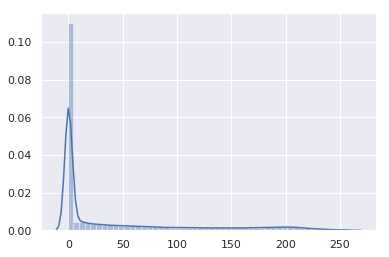

In [18]:
sb.distplot(pd.DataFrame(ground.PwrMtrP_kW_Avg)[ground.PwrMtrP_kW_Avg.notnull()])

## Working with the timestamps

In [22]:
timestamp=pd.DataFrame(ground['TIMESTAMP'])
timestamp.head()

,TIMESTAMP
0,2017-09-01 00:00:00-05:00
1,2017-09-01 00:01:00-05:00
2,2017-09-01 00:02:00-05:00
3,2017-09-01 00:03:00-05:00
4,2017-09-01 00:04:00-05:00


In [23]:
timestamp.describe()

,TIMESTAMP
count,525600
unique,525600
top,2017-03-23 03:34:00-05:00
freq,1


In [6]:
data = ground
data = data.drop(['Unnamed: 0', 'RECORD'], axis=1)
data = data.dropna()
data.isnull().sum()

TIMESTAMP         0
Pyra1_Wm2_Avg     0
Pyra2_Wm2_Avg     0
AmbTemp_C_Avg     0
InvPAC_kW_Avg     0
InvPDC_kW_Avg     0
PwrMtrP_kW_Avg    0
dtype: int64

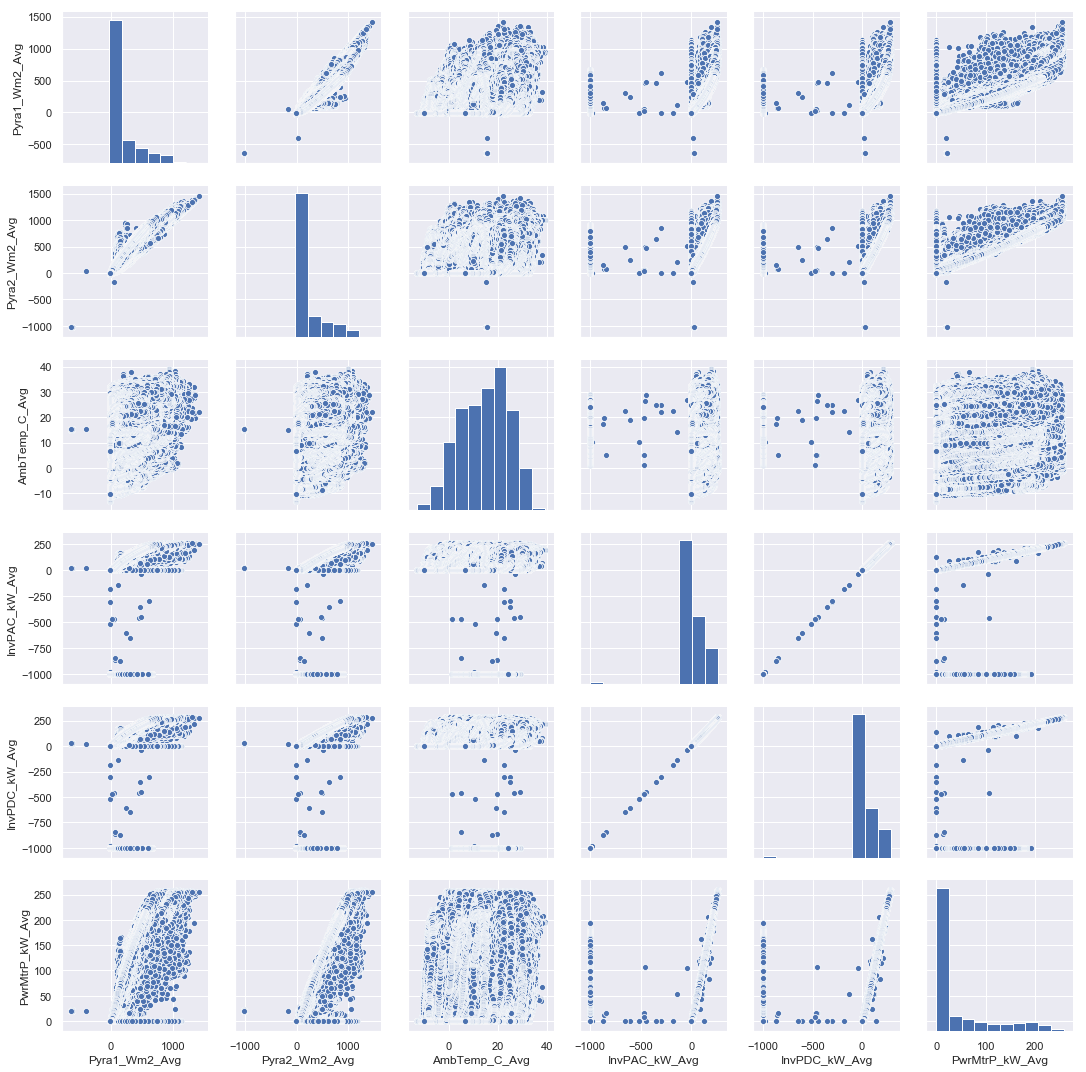

In [7]:
sb.pairplot(data = data)

In [8]:
features = data.drop(["InvPAC_kW_Avg"], axis=1)

                Pyra1_Wm2_Avg  Pyra2_Wm2_Avg  AmbTemp_C_Avg  InvPDC_kW_Avg  \
Pyra1_Wm2_Avg        1.000000       0.983328       0.394584       0.584738   
Pyra2_Wm2_Avg        0.983328       1.000000       0.338270       0.585870   
AmbTemp_C_Avg        0.394584       0.338270       1.000000       0.187966   
InvPDC_kW_Avg        0.584738       0.585870       0.187966       1.000000   
PwrMtrP_kW_Avg       0.959187       0.984286       0.303164       0.619437   

                PwrMtrP_kW_Avg  
Pyra1_Wm2_Avg         0.959187  
Pyra2_Wm2_Avg         0.984286  
AmbTemp_C_Avg         0.303164  
InvPDC_kW_Avg         0.619437  
PwrMtrP_kW_Avg        1.000000  


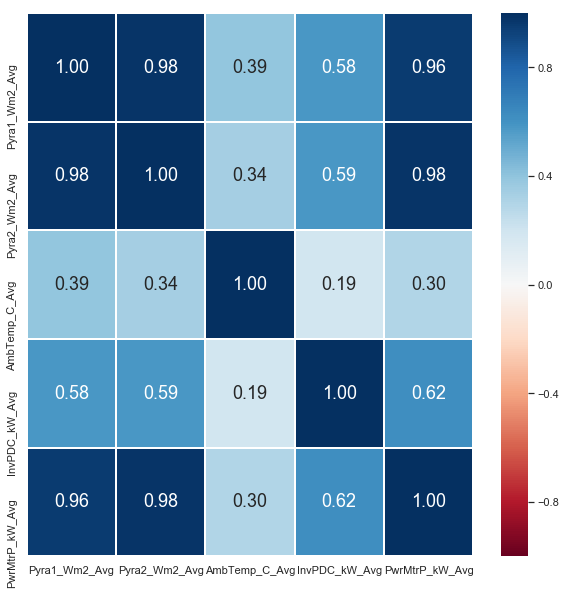

In [9]:
# Correlation Matrix
print(features.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(features.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

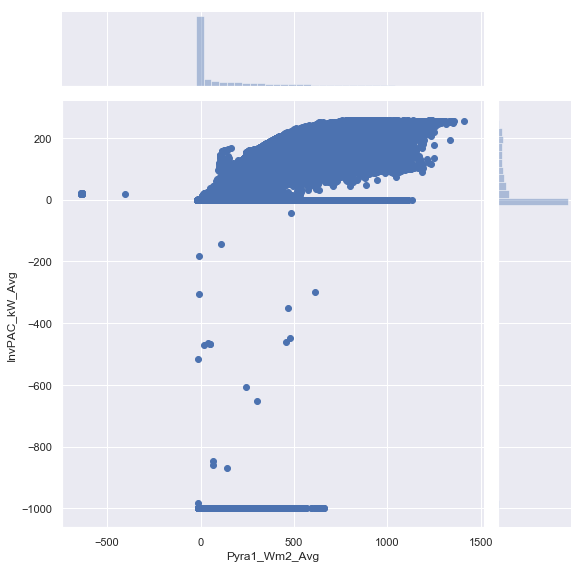

In [10]:
sb.jointplot(data["Pyra1_Wm2_Avg"], data["InvPAC_kW_Avg"], height = 8)